# Workshop 2: Signal Analysis in Frequency Domain

### Objective: To analyze continuous-time and discrete-time signals in frequency domain.



## 2.1 Fourier Series Approximation

####  Find the Fourier Series coefficients for the square wave given in Figure 1.  Hint: Take $𝑇_1$ = 𝑇/4 (Please note: Include an image of your work.)

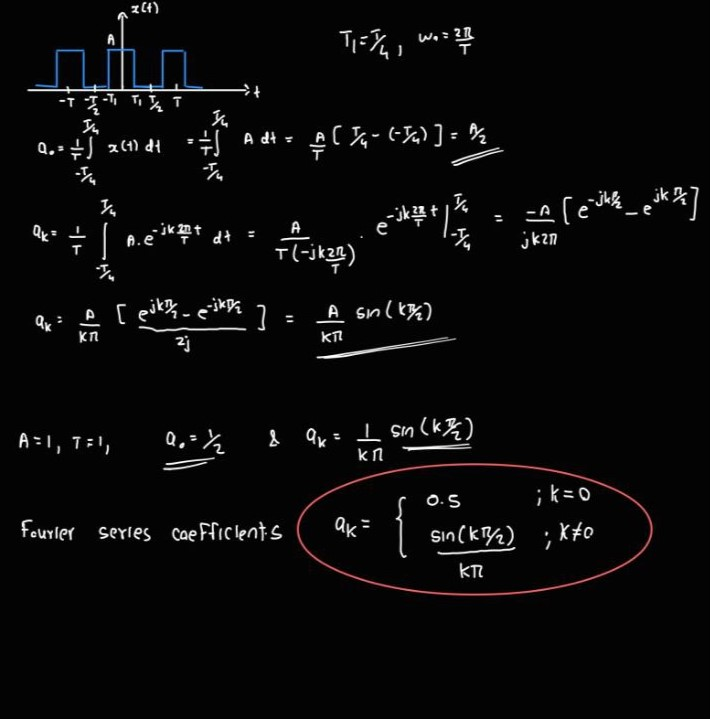

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

#### Q: Taking 𝐴 = 1V, 𝑇 = 1𝑠 complete the function 𝑎(𝑘) to return the Fourier series coefficients of the square wave for given any integer value of 𝑘. 

In [2]:
# Square pulse
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s

# Fourier Series coeffiecients
def a(k):
    # for k = 0 instance
    if k == 0:
        # a_k = Average value of the function
        a_k = 0.5
    else:
        # for k != 0 use coefficient formula
        a_k = 1*np.sin(k * np.pi / 2) / (k * np.pi)
    return a_k

#### Q: Complete the function fs_approx(t,N) to return the value of a Fourier series approximated periodic signal, at any given time. 

In [3]:
def fs_approx(t, N):
    x_t = 0.0
    
    #Parameters
    T = 1.0
    w0 = 2 * np.pi / T
    
    # Loop through -N to N and add individual complex exponentials
    for k in range(-N, N+1):
        x_t += (a(k) * np.exp(1j * k *w0 * t)).real    

    return x_t


 1. Create the array t with equally spaced 1000 elements in the interval [−2.5,2.5]
 2. Use the square(t) function to fill the array x with the values of square wave at each time instant in the array 𝑡.
 3. Use the function fs_approx(t,N) to fill the array y with the function values of the Fourier series approximated square wave.

In [4]:
# Fourier Series approximation of the square wave 
x = []
y = []
N = 5 # CHANGE HERE

# Creating a timestamp array
time = np.linspace(-2.5,2.5,1000)

# Filling in x and y arrays
for t in time:
    # Fill x array
    x.append(square(t))
    # Fill y array
    y.append(fs_approx(t,N))
    

    

[]

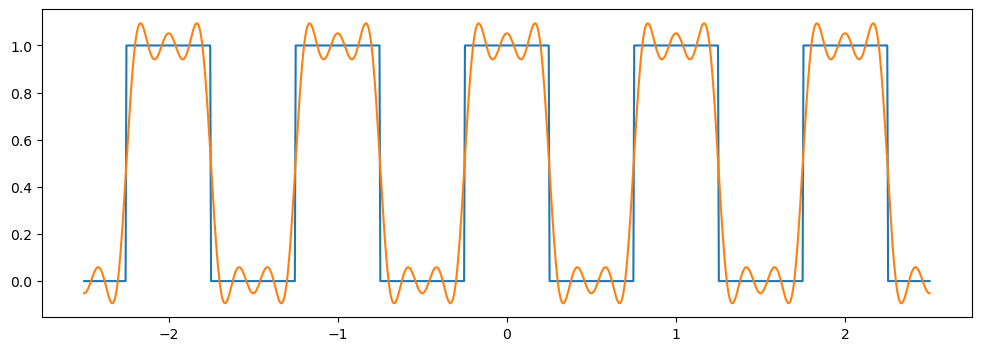

In [5]:
# Plotting
fig,ax = plt.subplots(figsize=(12,4))

# Editing plot parameters
ax.plot(time,x)
ax.plot(time,y)
ax.plot()


#### Q: Plot the original signal, 𝑥(𝑡) and the approximated signal, $𝑥_𝑁$(𝑡) in the same figure for 𝑁 = 50. 


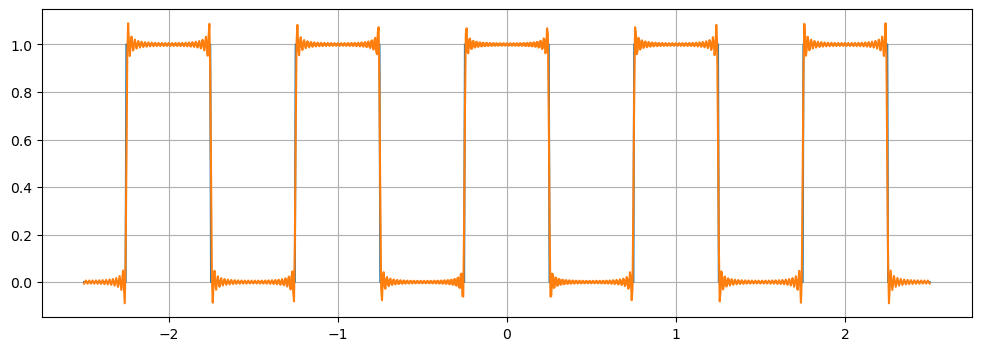

In [13]:
# New values
x_2 = []
y_2 = []
N = 50

# Filling x and y arrays
for t in time:
    # Fill x_2 array
    x_2.append(square(t))
    # Fill y array
    y_2.append(fs_approx(t,N))

# Plotting    
fig,ax = plt.subplots(figsize=(12,4))

# Editing plot parameters
ax.plot(time,x_2)
ax.plot(time,y_2)
ax.grid()
plt.show()

#### Q: Comment on your observations. ( i.e. for 𝑁 = 5 and 𝑁 = 50)


When we increase N we increase the number of complex exponential terms in Fourier series expansion approximation of x(t). Therefore it's accuracy increases and gets closer and closer to the original x(t) square wave.

##  2.2 Fourier Series Coefficients [Graded]

#### Create the two arrays k and ak with integers in the interval 𝑘 = −20,... ,20 and the Fourier series coefficients of the square wave for each 𝑘 value in the array, respectively. Use stem() function to plot the Fourier series coefficients against 𝑘. 


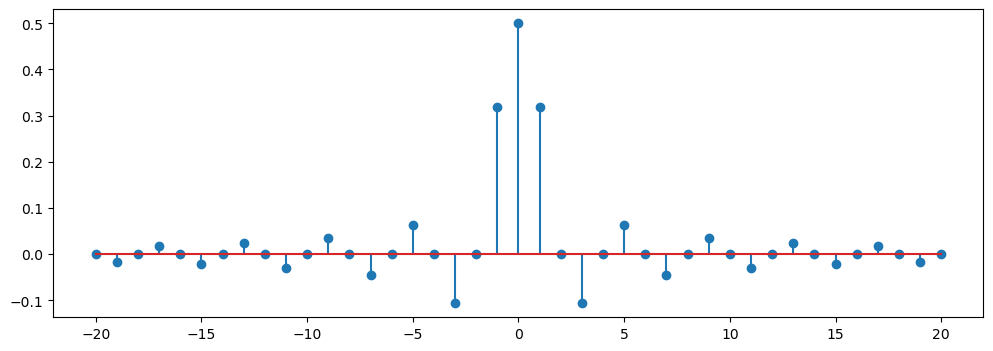

In [6]:
# Creating two arrays
k = [i for i in range(-20,20+1)]
# Using list comprehension to get an array of a_k values for each k
ak = [a(k_val) for k_val in k]

# Creating stem plot
fig,ax = plt.subplots(figsize=(12,4))
ax.stem(k,ak);




#### Q: Plot normalized Fast Fourier Transform (FFT) coefficients in $𝑋_{norm}$ vs 𝑘 with stem() function. Use set_xlim() function to limit the x-axis to the interval [−20,20] . 

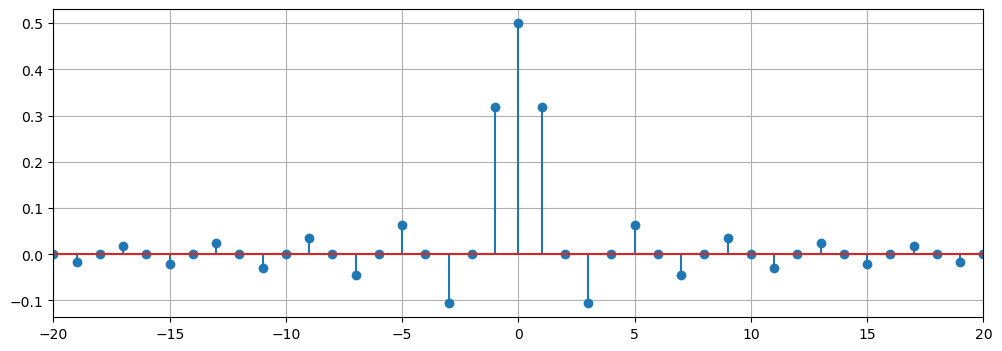

In [15]:
N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))
 
# Obtaining FFT coefficients
X = fftshift(fft(x))
X_norm = X.real/N
k = np.linspace(-N/2, N/2-1, N)

# plotting fft coefficients
# Your code goes here
fig,ax = plt.subplots(figsize=(12,4))

# Plotting the FFT generated fourier coefficients against k values
ax.stem(k,X_norm)
ax.set_xlim(-20,20)
ax.grid()
plt.show()

#### Q: Comment on the observations from the above codes. 

The result from the calculated Fourier coefficients and the result from the FFT algorithm match correctly with each other. The envelop of the Fourier coefficients is seen to be a sinc function. The Fourier coefficients are symmetrical about the y axis therefore 
$a_k$ is even.

# 2.3 Ideal Filters and Actual Filters


 𝑥(𝑡) = 𝑎1 sin(𝜔1𝑡) + 𝑎2 sin(𝜔2𝑡) + 𝑎3 sin(𝜔3𝑡)
 where 𝑎1 = 0.75, 𝑎2 = 1, 𝑎3 = 0.5, 
       𝜔1= 100𝜋, 𝜔2 = 400𝜋, 𝜔3 = 800𝜋 [Graded]

In [8]:
# Creating 3 sinusoidal signals
# Your code goes here
w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi
a1 = 0.75
a2 = 1
a3 = 0.5

fs = 4095
ws = 2*np.pi*fs

def x(t):
    x_t = a1*np.sin(w1*t)+a2*np.sin(w2*t)+a3*np.sin(w3*t)
    return x_t

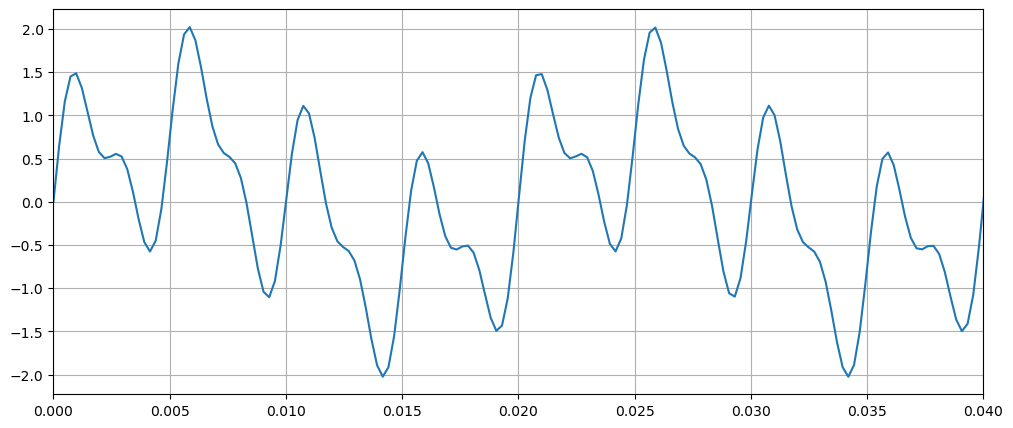

In [9]:
time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]

#Plotting the input signal in time domain
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(time,xt)
ax.set_xlim(0,0.04)
ax.grid()
plt.show()

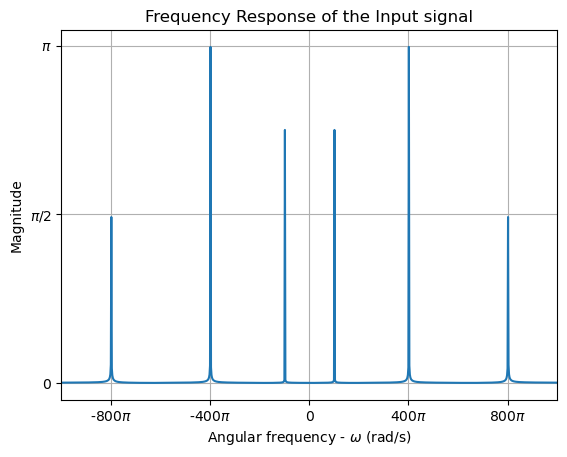

In [18]:
# Fourier Transform of x(t)
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2

# Plotting the input signal in frequency domain
fig, ax = plt.subplots()
# Your code goes here
Xw_abs = np.abs(Xw)
ax.plot(w,Xw_abs)

# Editing plot attributes
ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

In [19]:
# Ideal filter
wc1 =(w1+w2)/2
wc2 =(w2+w3)/2
def ideal_filter(w):
    # Your code goes here
    gain = 1
    if np.abs(w) <= wc1 or np.abs(w) >= wc2:
        gain = 0
    return gain

 ## 2.3.1 Ideal Filter: Part A

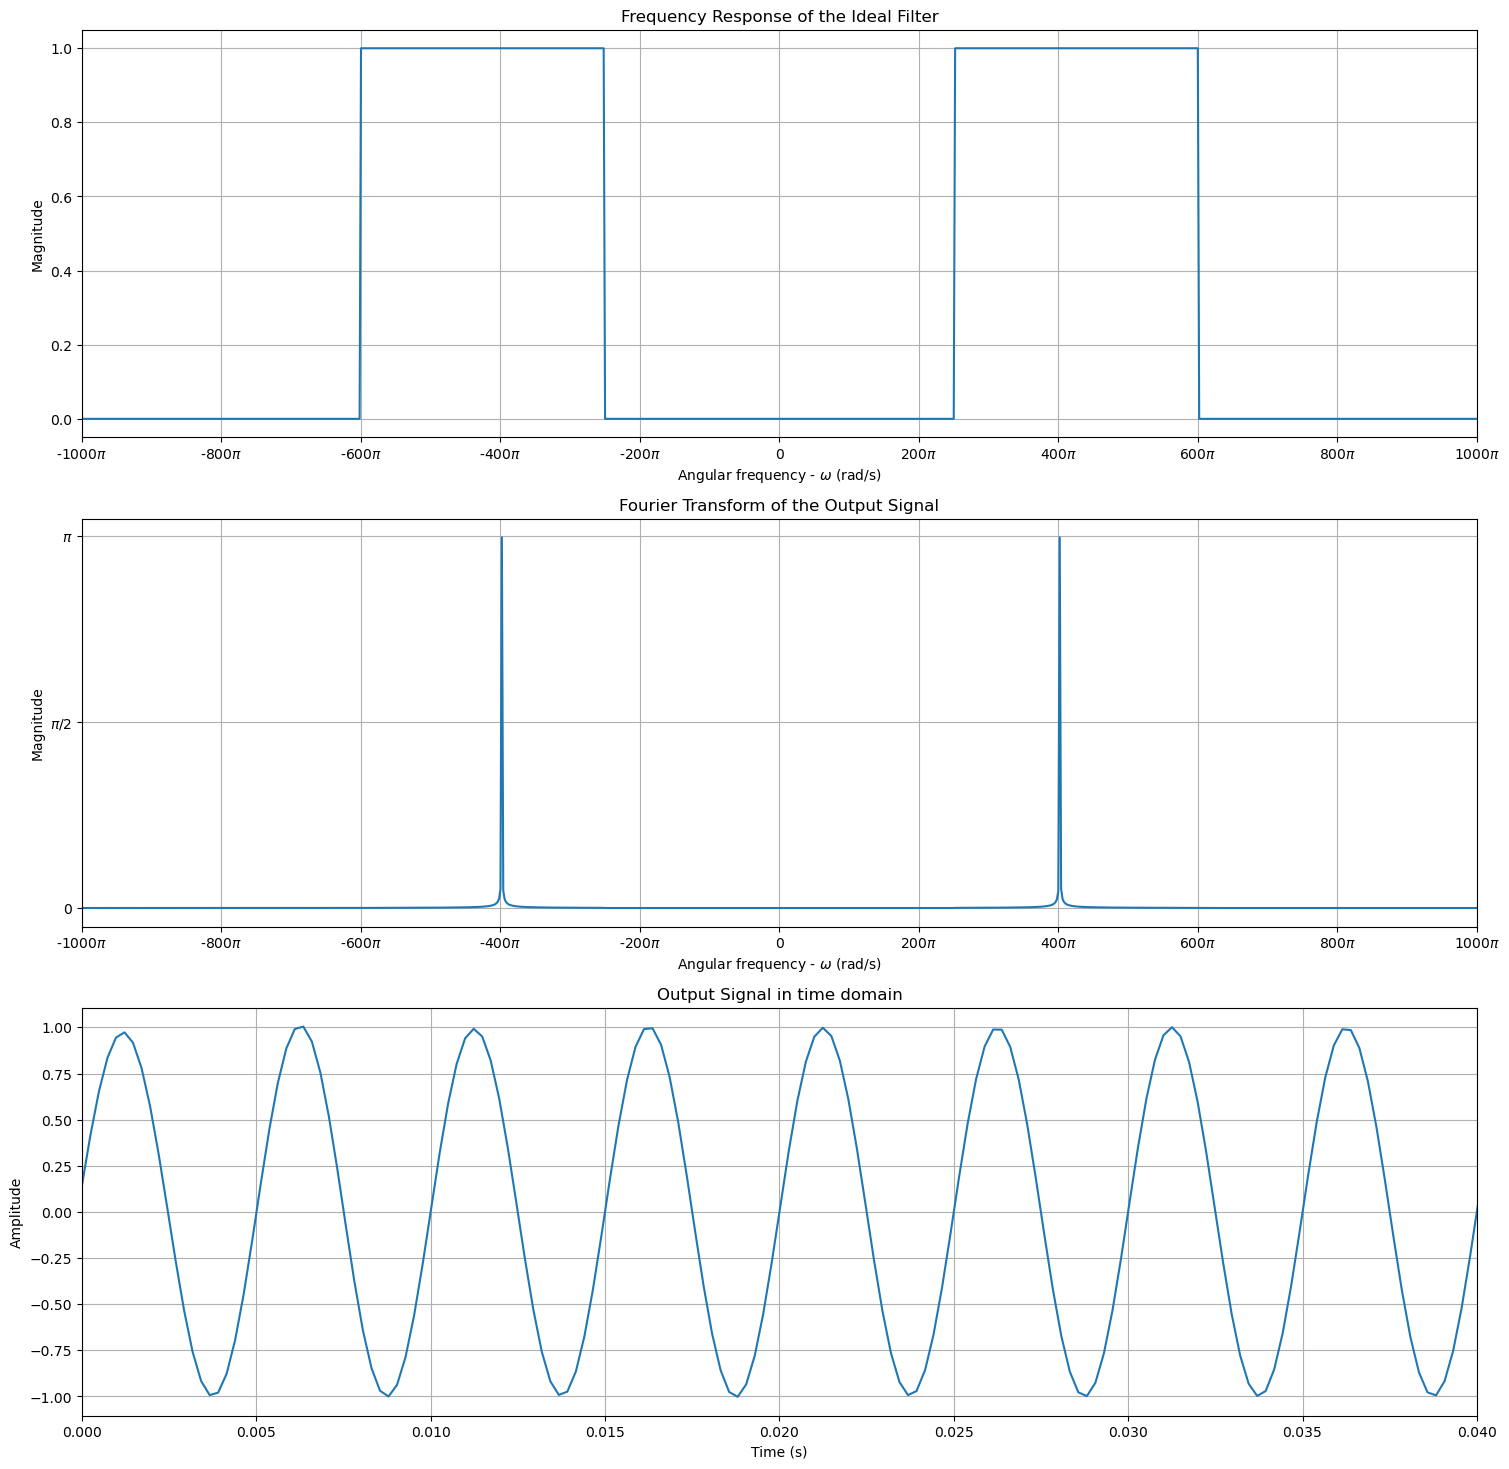

In [20]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Your code goes here
H0w = [ideal_filter(i) for i in w]


# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)

# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))

# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

## 2.3.2 Ideal Filter: Part B

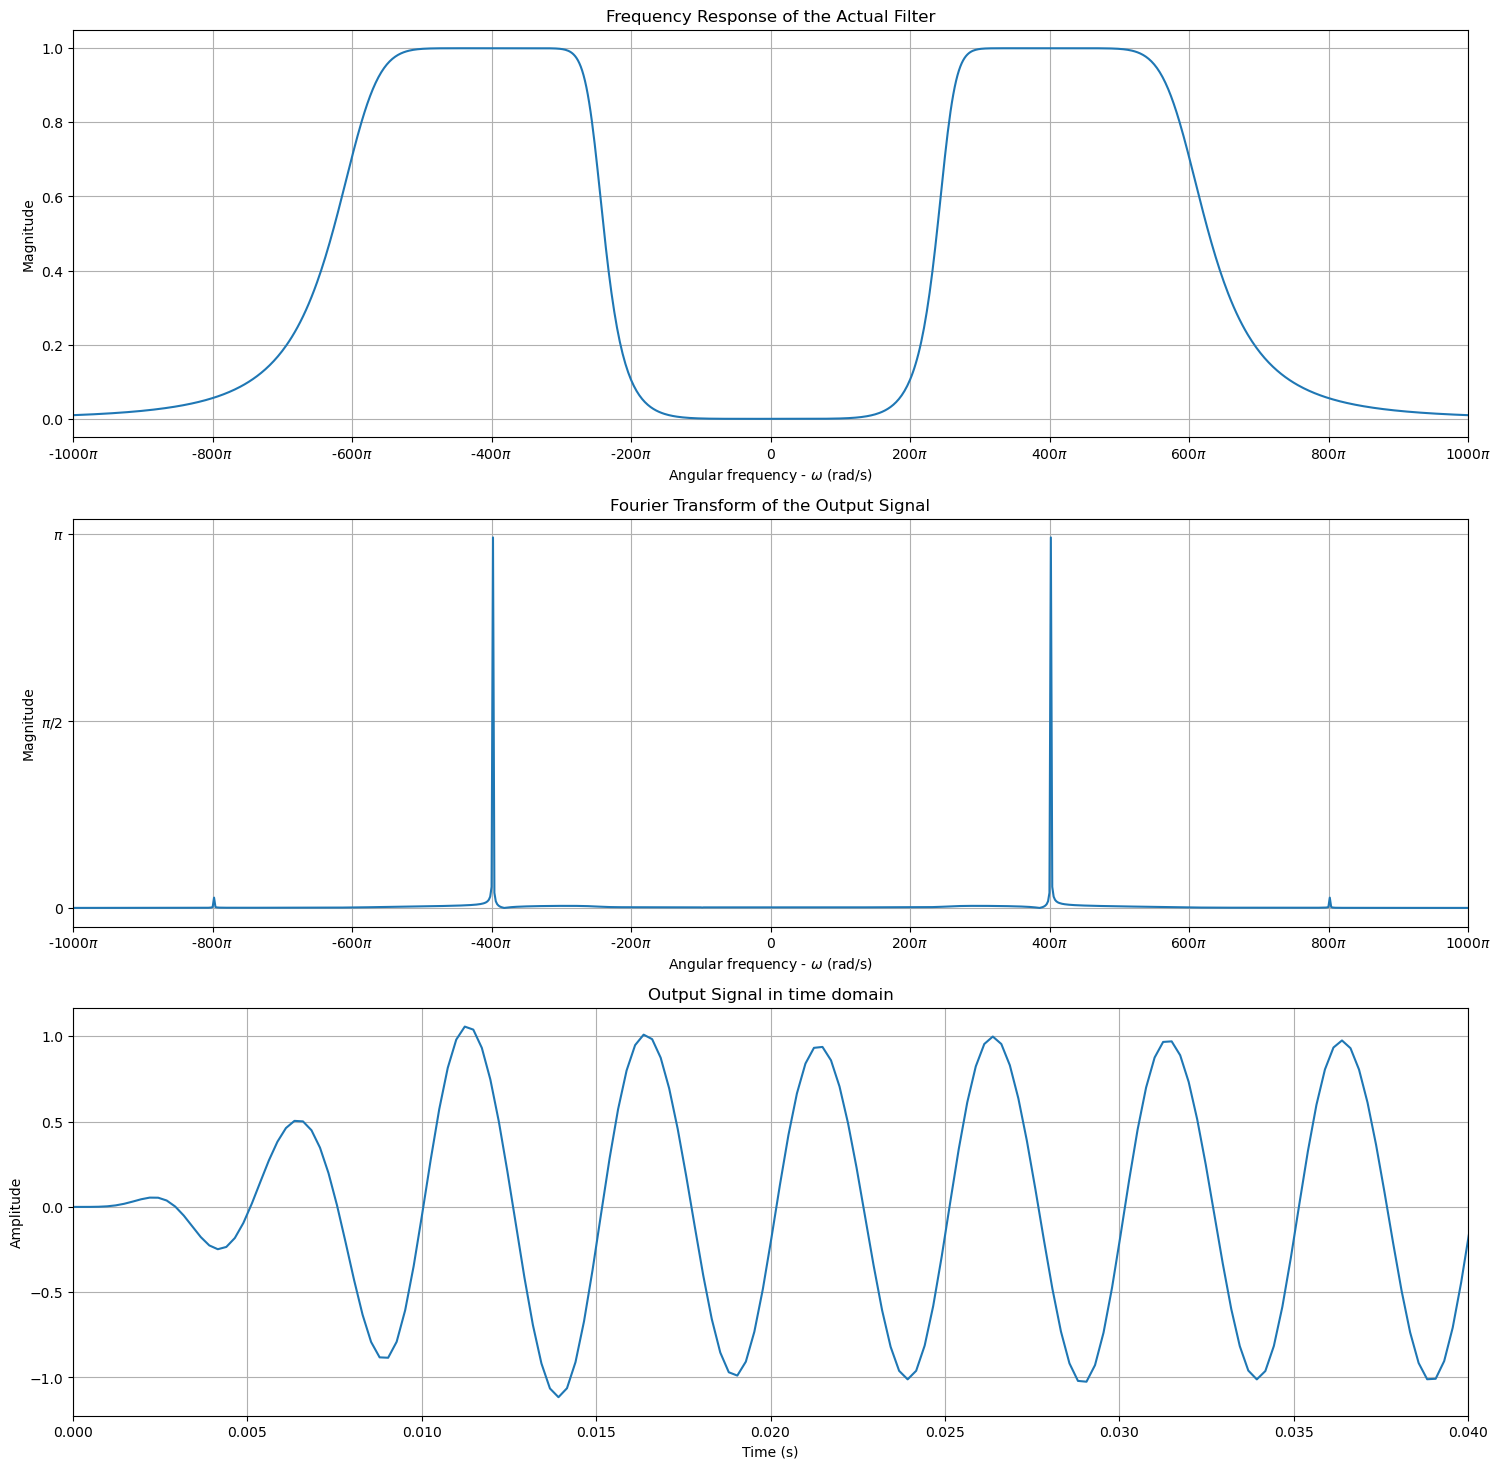

In [21]:
 # Actual Filter
 b, a =signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
 ww,h=signal.freqz(b, a, 2047)
 ww =np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
 h =np.append(np.flipud(h), h)
    
 # Filtering
 y =signal.lfilter(b,a,xt)
 
 # Obtaining the frequency response of the output signal
 Y =fft(y,4096)*2*np.pi/fs
 Y =fftshift(Y)
    
 # Actual filter frequency response (magnitude)
 fig, axes = plt.subplots(3,1, figsize=(18,18))
 axes[0].plot(ww, abs(h) )
 axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
 axes[0].set_ylabel('Magnitude')
 axes[0].set_title('Frequency Response of the Actual Filter')
 axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
 axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
 axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
 axes[0].grid()
    
 # Frequency response of the actual filter output (magnitude)
 axes[1].plot(w,abs(Y))
 axes[1].set_title('Fourier Transform of the Output Signal')
 axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
 axes[1].set_ylabel('Magnitude')
 axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
 axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
 axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
 axes[1].set_yticks([0,np.pi/2,np.pi])
 axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
 axes[1].grid()

 # # Output signal in time domain
 axes[2].plot(time,np.real(y))
 axes[2].set_title('Output Signal in time domain')
 axes[2].set_xlabel('Time (s)')
 axes[2].set_ylabel('Amplitude')
 axes[2].set_xlim(0, 0.04)
 axes[2].grid()

#### Q: Comment on your observations in Part- A and Part- B. 

Eventhough the ideal filter exactly filters only the frequencies between 250 rad/s and 400 rad/s, the actual filter is not that perfect so it captures some frequencies after 600 rad/s also. We can see a clear and wide transition band between the frequencies 500 rad/s and 800 rad/s. So the resulting signal contains a small amount of the frequency 800 rad/s too. This can be seen as a small spike in the Fourier Transform plot. So the resulting signal is not a pure sinusoid but a combination of two sinusoids with frequencies 400 rad/s and 800 rad/s.

## 2.4 Removing Power Line Noise in an ECG Signal

#### Task 1. Write a python script to read the data in the file ecg_signal.csv and fill the list ecg with the data.

In [22]:
import csv

# Reading the ECG data
ecg = []

with open('ecg_signal.csv') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        ecg.append(float(row[0]))

duration = 10 # seconds
T =duration/len(ecg)
Fs = 1/T

# Obtaining the fourier transform
F =fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

#### Task 2. Plot the absolute value of the Fourier transform with respect to frequency. Limit the 𝑥-axis to the interval [−100, 100]. Sketch the output.

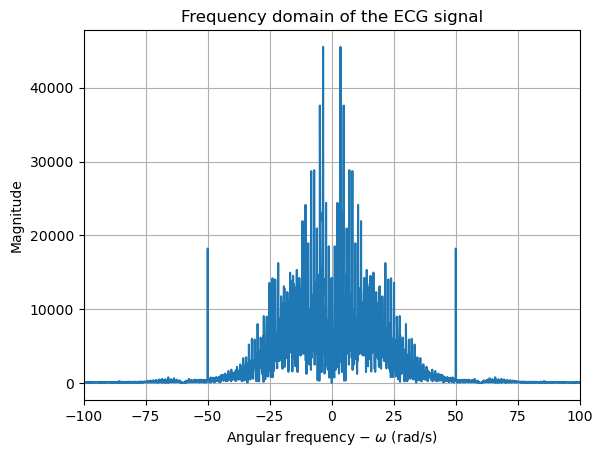

In [23]:
# Plotting the ecg signal in frequency domain
fig, ax = plt.subplots()

# Taking the absolute value and plotting
F_abs=np.abs(F)
ax.plot(fr,F_abs)

# Setting plot parameters
ax.set_title('Frequency domain of the ECG signal')
ax.set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')

ax.set_xlim(-100, 100)

plt.grid()

#### Task 3. What type of filter that can be used to remove the noise at 50 Hz?

A bandstop filter

#### Task 4. Edit the code below with the correct name of the filter selecting from the table given below. Execute the cell and sketch the frequency response of the filter

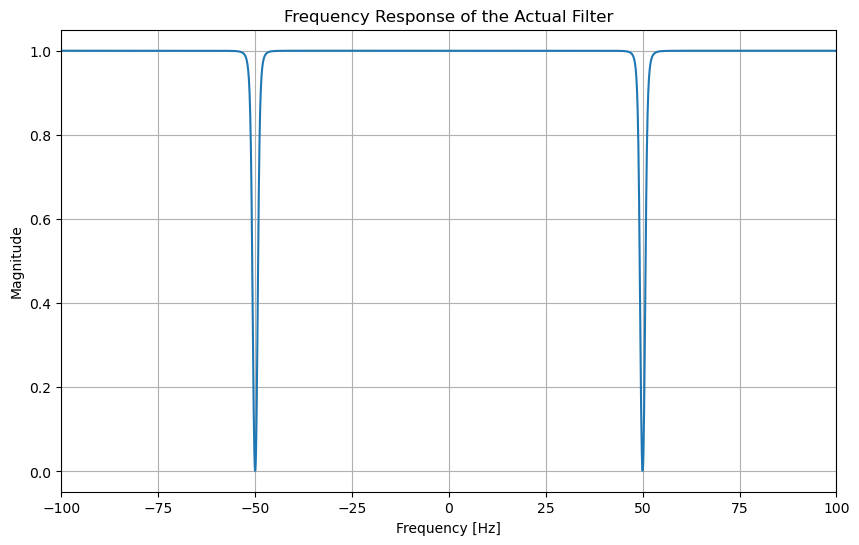

In [24]:
# Designing the filter
f1 = 49
f2 = 51

# Applying bandstop filter
filter_type = 'bandstop'
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)

# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)

# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()

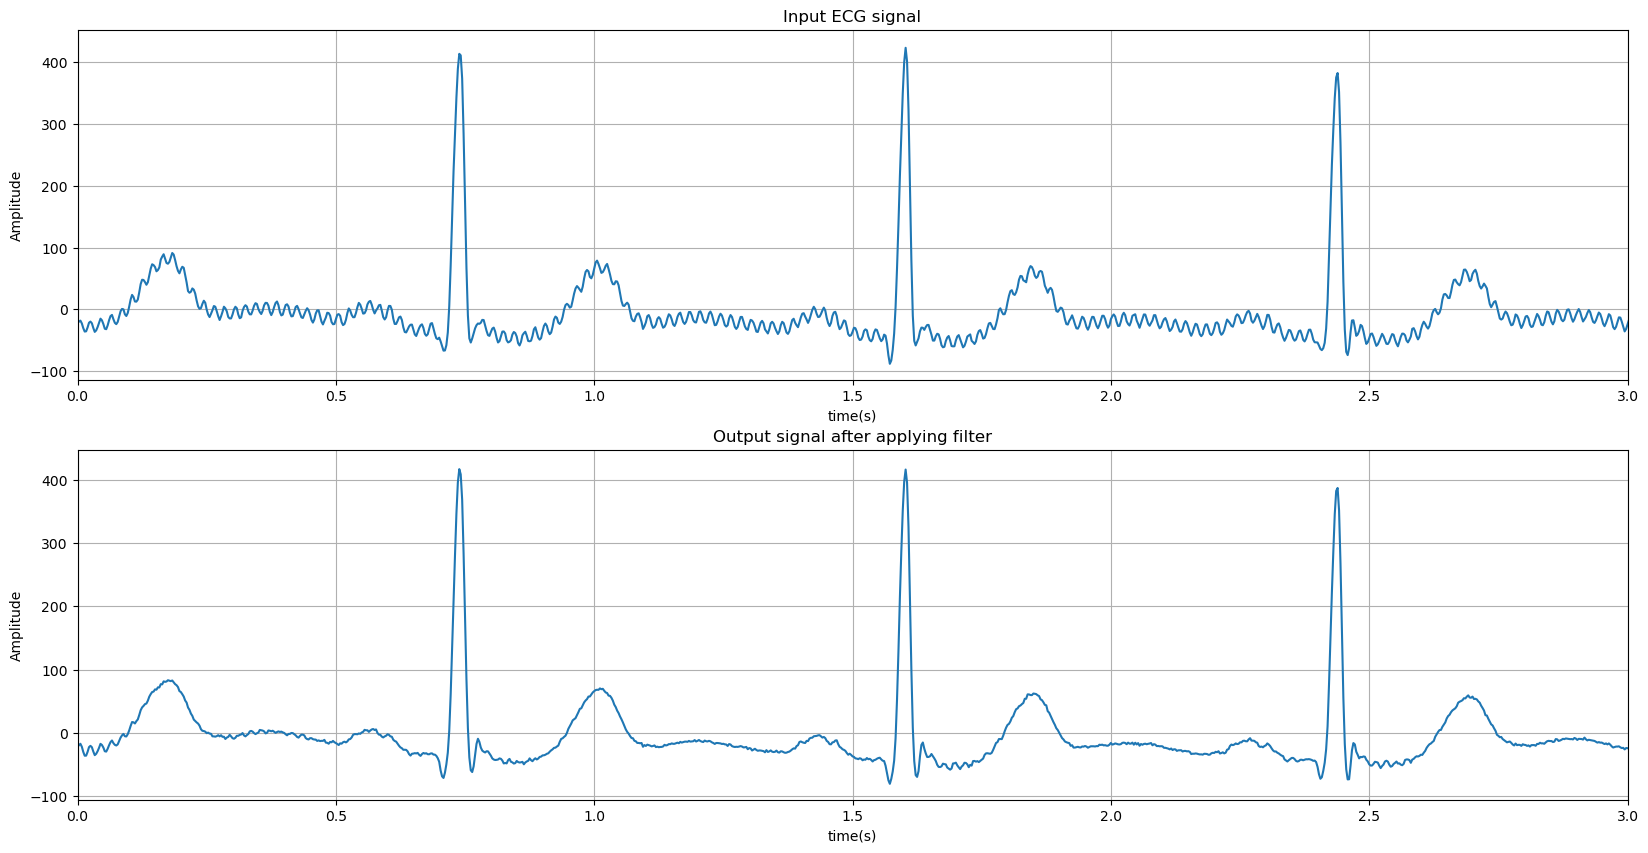

In [25]:
time = np.arange(T, duration+T, T)

# Filtering the ECG waveform
output = signal.lfilter(b, a, ecg)

# Plotting
fig, axes = plt.subplots(2,1, figsize=(20,10));
axes[0].plot(time,ecg);
axes[1].plot(time,output);

# Limiting time scale
axes[0].set_xlim(0,3);
axes[1].set_xlim(0,3);

# Adding labels
axes[0].set_xlabel('time(s)')
axes[0].set_ylabel('Amplitude')

axes[1].set_xlabel('time(s)')
axes[1].set_ylabel('Amplitude')

# Adding titles
axes[0].set_title('Input ECG signal');
axes[1].set_title('Output signal after applying filter');

# Adding gridlines
axes[0].grid()
axes[1].grid()

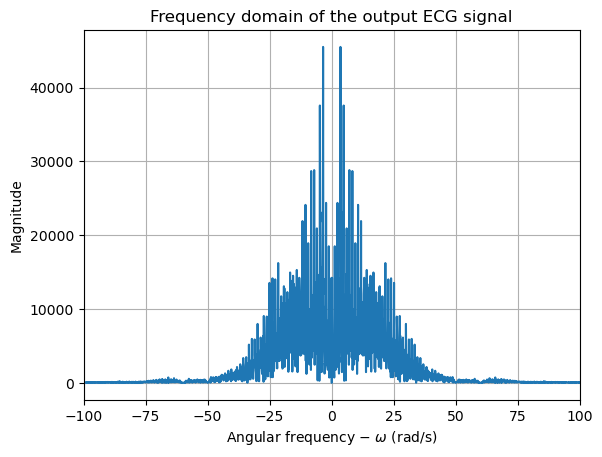

In [26]:
# Calculating the Fourier transform
F = fftshift(fft(output))

# Plotting the output signal in frequency domain
fig, ax = plt.subplots()

# Taking the absolute value and plotting
F_out_abs=np.abs(F)
ax.plot(fr,F_out_abs)

# Setting plot parameters
ax.set_title('Frequency domain of the output ECG signal')
ax.set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')

ax.set_xlim(-100, 100)
plt.grid()